## Python titanic exercise

[exercise description](https://github.com/tlmohren/python320kincaid/blob/master/exercises/optional_exercise_machine_learning.md)

[titanic data description](https://www.kaggle.com/c/titanic/data)

In [1]:
import numpy as np
import pandas as pd
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('data\\titanic_train.csv')
test_df = pd.read_csv('data\\titanic_test.csv')
combine = [train_df,test_df]
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [3]:
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [4]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gilinski, Mr. Eliezer",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [5]:
# print( train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean() )
# print('_'*20)
# print(train_df[["Sex","Survived"]].groupby(['Sex'],as_index=False).mean() )
# print('_'*20)
# print( train_df[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).mean() )
# print('_'*20)
# print( train_df[["Parch","Survived"]].groupby(["Parch"]).mean() )

In [6]:
guess_ages = np.zeros((2,3))
title_mapping = {"Mr":1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    # find title
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    
    #replace rare titles by 'rare'
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                'Don','Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    # replace misspellings 
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # map title into cardinal value
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    #map gender into categorical feature
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male':0}).astype(int)
    
    # guess non given ages 
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                               (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex ==i) & (dataset.Pclass == j+1), \
                       'Age'] = guess_ages[i,j] 
    dataset['Age'] = dataset['Age'].astype(int)

In [7]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], \
                        as_index=False).mean().sort_values(by='FareBand', ascending=True)

# # convert age into cardinal values 
train_df['AgeBand'] = pd.cut( train_df['Age'],5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

freq_port = train_df.Embarked.dropna().mode()[0] 
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
                                           
dataset.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,NaN,S,3
5,897,3,"Svensson, Mr. Johan Cervin",0,14,0,0,7538,9.2250,NaN,S,1
6,898,3,"Connolly, Miss. Kate",1,30,0,0,330972,7.6292,NaN,Q,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26,1,1,248738,29.0000,NaN,S,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18,0,0,2657,7.2292,NaN,C,3
9,901,3,"Davies, Mr. John Samuel",0,21,2,0,A/4 48871,24.1500,NaN,S,1


In [8]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0 
    dataset.loc[(dataset['Age'] >16) & (dataset['Age'] <=32), 'Age'] = 1
    dataset.loc[(dataset['Age'] >32) & (dataset['Age'] <=48), 'Age'] = 2
    dataset.loc[(dataset['Age'] >48) & (dataset['Age'] <=64), 'Age'] = 3
    dataset.loc[(dataset['Age'] >64),'Age']  = 4

    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

    dataset['FamilySize'] = dataset['SibSp']+ dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    dataset['Embarked'] = dataset['Embarked'].map( {'S':0, 'C': 1, 'Q':2 } ).astype(int)
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
combine = [train_df, test_df]

In [9]:
# #drop names 
train_df = train_df.drop(['PassengerId','AgeBand','FareBand','Name','Cabin','Ticket'],axis=1) 
test_df = test_df.drop(['Name','Cabin','Ticket'],axis=1) 
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,0,0,0,1,2,0,3
1,1,1,1,2,1,0,3,1,3,2,0,2
2,1,3,1,1,0,0,1,0,2,1,1,3
3,1,1,1,2,1,0,3,0,3,2,0,2
4,0,3,0,2,0,0,1,0,1,1,1,6


In [10]:
# for dataset in combine:
# test_df.head()
# train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

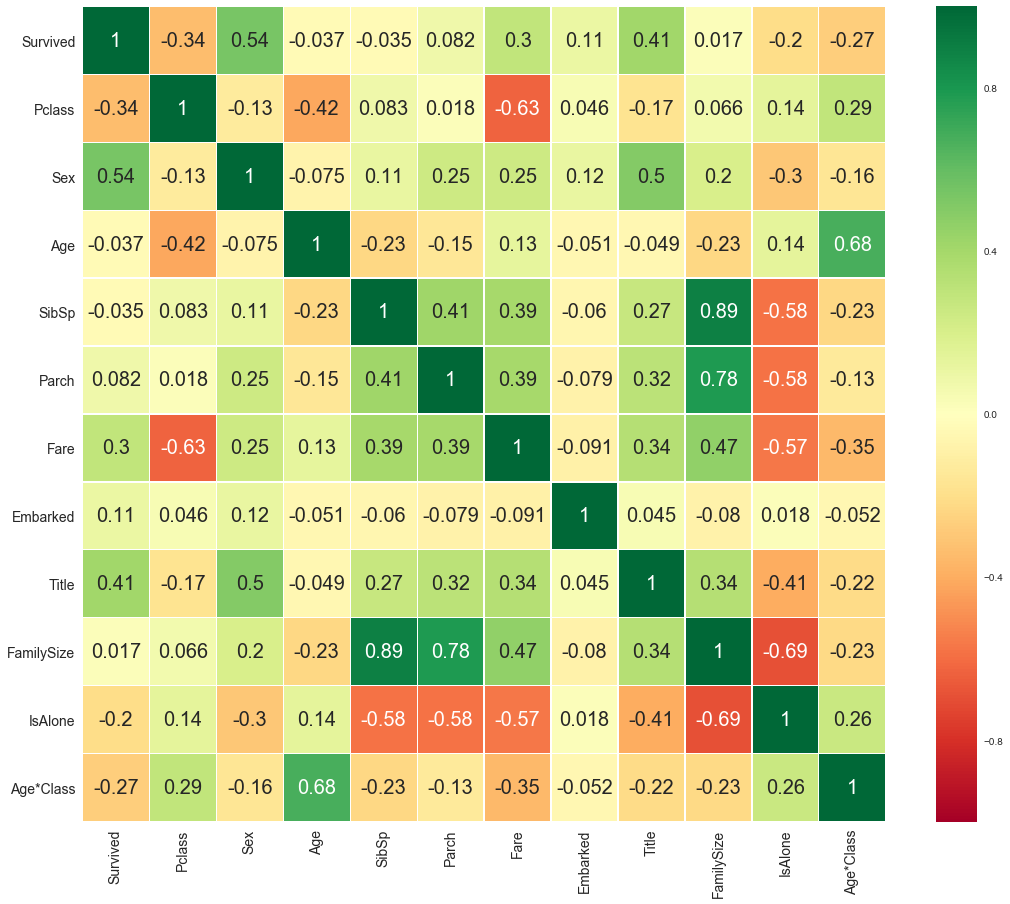

In [11]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

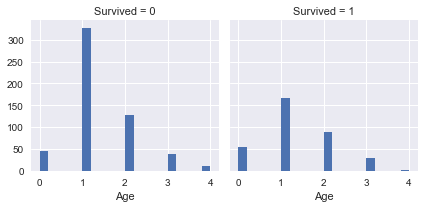

In [12]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist, 'Age', bins=20)

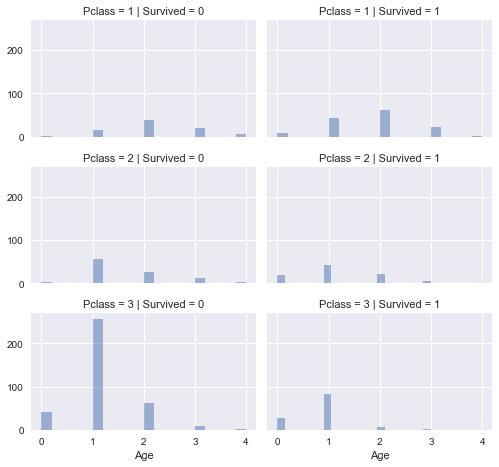

In [13]:
grid = sns.FacetGrid(train_df,col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist,'Age', alpha =.5, bins=20)

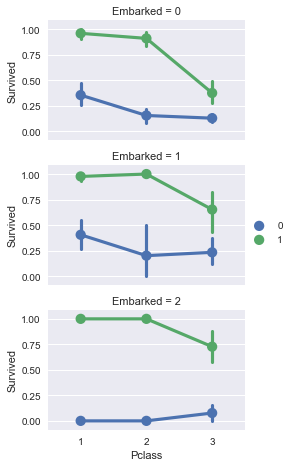

In [14]:
grid = sns.FacetGrid(train_df,row='Embarked', size=2.2, aspect= 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

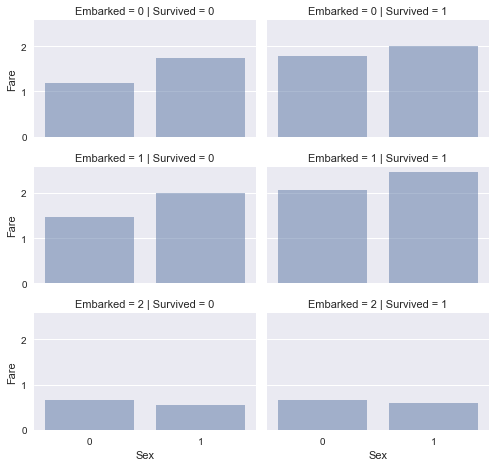

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived',  size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [16]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [19]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

81.93


In [18]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.188161
7,Title,0.468663
5,Fare,0.245550
6,Embarked,0.207835
8,FamilySize,-0.128657
4,Parch,-0.173487
10,Age*Class,-0.191924
2,Age,-0.291008
9,IsAlone,-0.405213
3,SibSp,-0.491828


In [20]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.840000000000003

In [23]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.060000000000002

In [24]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.010000000000005

In [25]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.239999999999995

In [26]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.590000000000003

In [27]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

67.340000000000003

In [28]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.0

In [29]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.0

In [30]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.00
8,Decision Tree,89.00
1,KNN,84.06
0,Support Vector Machines,83.84
2,Logistic Regression,81.93
7,Linear SVC,81.59
5,Perceptron,79.24
4,Naive Bayes,79.01
6,Stochastic Gradient Decent,67.34
